In [1]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
bank_data = pd.read_csv("/Users/ramyanee/Downloads/ML/bank-additional/bank-additional-full.csv",sep=';')

In [3]:
d = bank_data.copy()

In [4]:
d['loan'].dtypes == 'object'

True

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
d = d.drop('duration',axis = 1)

In [7]:
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 25,5
# sns.countplot(x= 'job', hue = 'y', data=d)

In [8]:
# sns.countplot(x= 'marital', hue = 'y', data=d)

In [9]:
# sns.countplot(x= 'education', hue = 'y', data=d)

In [10]:
# sns.countplot(x= 'job', hue = 'y', data=d)

In [11]:
# fig, a = plt.subplots(1,5,figsize=(30, 5));
# sns.countplot(x= 'default', hue = 'y', data=d, ax = a[0]);
# sns.countplot(x= 'housing', hue = 'y', data=d, ax=a[1]);
# sns.countplot(x= 'loan', hue = 'y', data=d, ax =a[2]);
# sns.countplot(x= 'contact', hue = 'y', data=d, ax =a[3]);
# sns.countplot(x= 'poutcome', hue = 'y', data=d, ax =a[4]);
# a[0].set_xticklabels(a[0].get_xticklabels(), rotation=90);

In [12]:
# from sklearn.preprocessing import LabelEncoder 
# le = LabelEncoder()
# for col in d.columns:
#     if d[col].dtypes == 'object':
#         d[col] = le.fit_transform(d[col])
d = pd.get_dummies(d, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])


In [13]:
d.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0


In [14]:
d = d.sample(frac = 1)

In [15]:
d = pd.get_dummies(d,columns = ['y'],drop_first = True)

In [16]:
d = d.rename(columns={'y_yes':'y'})

In [17]:
d.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
8546,46,10,999,0,1.4,94.465,-41.8,4.864,5228.1,1,...,0,0,0,0,0,1,0,1,0,0
36678,51,1,999,0,-2.9,92.963,-40.8,1.268,5076.2,0,...,0,1,0,0,0,0,0,1,0,1
39494,57,2,999,0,-1.8,93.749,-34.6,0.644,5008.7,0,...,0,0,0,1,0,0,0,1,0,1
10391,45,1,999,0,1.4,94.465,-41.8,4.960,5228.1,1,...,0,0,1,0,0,0,0,1,0,0
31032,33,2,999,1,-1.8,92.893,-46.2,1.344,5099.1,0,...,0,0,0,0,1,0,1,0,0,0


In [18]:
def tts(data):
  size = len(data)
  train_test_margin = int(0.7*size)

  trainSet = data[:train_test_margin]
  testSet = data[train_test_margin:]

  trainSet_x = trainSet.drop("y",axis=1)
  trainSet_y = trainSet["y"]
  testSet_x = testSet.drop("y",axis=1)
  testSet_y = testSet["y"]

  return trainSet_x,trainSet_y,testSet_x,testSet_y

In [19]:
trainSet_x,trainSet_y,testSet_x,testSet_y = tts(d)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classification = model.fit(trainSet_x,trainSet_y)
predictions = model.predict(testSet_x)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [21]:
def acc_(predictions,testSet_y):
  test_size = len(testSet_y)
  testSet_y = list(testSet_y)
  correct_predictions = 0
  for i in range(test_size):
    if testSet_y[i]==predictions[i]:
      correct_predictions= correct_predictions+1
  return (correct_predictions/test_size)*100


In [22]:
acc_(predictions,testSet_y)

84.00906368859755

In [23]:
predictions_trainset = model.predict(trainSet_x)

In [24]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [25]:
print(classification_report(testSet_y,predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     10960
           1       0.31      0.34      0.33      1397

    accuracy                           0.84     12357
   macro avg       0.61      0.62      0.62     12357
weighted avg       0.85      0.84      0.84     12357



In [26]:
# #overfitting check
# print(classification_report(trainSet_y,predictions_trainset))


# cm_t = plot_confusion_matrix(model, trainSet_x, trainSet_y,
#                                  display_labels=('no','yes'),
#                                  cmap=plt.cm.Blues,
#                                  )
# cm_t.ax_.set_title('Normalized Confusion Matrix')

# print('Normalized Confusion Matrix')
# conf_train = cm_t.confusion_matrix
# print(conf_train)
# plt.show


# print((conf_train[0][0]+conf_train[1][1])/trainSet_y.size)

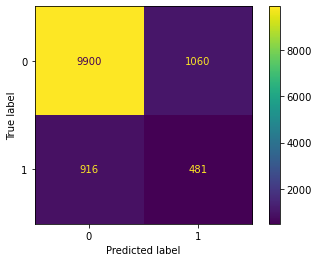

In [27]:
plot_confusion_matrix(model,testSet_x,testSet_y)

Normalized Confusion Matrix
[[9900 1060]
 [ 916  481]]


<function matplotlib.pyplot.show(close=None, block=None)>

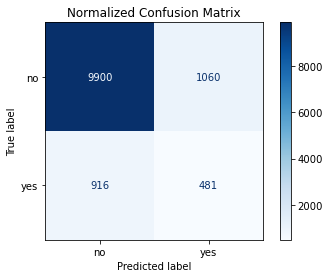

In [28]:
cm = plot_confusion_matrix(model, testSet_x, testSet_y,
                                 display_labels=('no','yes'),
                                 cmap=plt.cm.Blues,
                                 )
cm.ax_.set_title('Normalized Confusion Matrix')

print('Normalized Confusion Matrix')
conf = cm.confusion_matrix
print(conf)
plt.show

In [29]:
#(conf[0][0]+conf[1][1])/testSet_y.size

In [30]:
#help(sklearn.tree._tree.Tree)

In [31]:
from sklearn.tree._tree import TREE_LEAF

In [32]:
c = classification

In [33]:
# leaves_l = []

# for i in range(len(lc)):
#   if lc[i] == TREE_LEAF:
#     leaves_l.append(i)

In [34]:
# leaves_r= []

# for i in range(len(lc)):
#   if lc[i] == TREE_LEAF:
#     leaves_r.append(i)

In [35]:
# set(leaves_l)==set(leaves_r)

In [36]:
def sum_of_impurity_leaves(decision_tree_classification_summary,size):
  c = decision_tree_classification_summary
  leaves= []
  sum = 0
  w = c.tree_.n_node_samples
  lc = c.tree_.children_left
  for i in range(len(lc)):
    if c.tree_.children_left[i] == TREE_LEAF:
      p = w[i]/size
      sum = sum + c.tree_.impurity[i]*p
  return sum



In [37]:
def grid_search(c_alphas,trainSet_x,trainSet_y,testSet_x,testSet_y):
  
  best = 0
  best_alpha = 0
  best_classification = None
  sum_of_impurities = []
  accuracies_tr = []
  accuracies_ts = []

  for a in c_alphas:

    model = DecisionTreeClassifier(ccp_alpha=a)
    c = model.fit(trainSet_x,trainSet_y)
    predictions_ts = model.predict(testSet_x)
    predictions_tr = model.predict(trainSet_x)

    sum_of_impurities.append(sum_of_impurity_leaves(c,trainSet_y.size))
    accuracy_ts = acc_(predictions_ts,testSet_y)
    accuracy_tr = acc_(predictions_tr,trainSet_y)
#     print(a)
#     print(accuracy_ts)
#     print(accuracy_tr)
    accuracies_ts.append(accuracy_ts)
    accuracies_tr.append(accuracy_tr)


    if accuracy_ts > best:
      best = accuracy_ts 
      best_alpha = a
      best_classification = c

    gridsearch_results = pd.DataFrame(list(zip(alphas,accuracies_tr,accuracies_ts,sum_of_impurities)),
               columns =['Alphas','Training Accuracy', 'Testing Accuracy', 'Sum of Impurities'])

  return best_alpha,best_classification,gridsearch_results


In [38]:
alphas = np.arange(0,0.04,0.0001)

In [39]:
alphas

array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055,
       0.0056, 0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063,
       0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071,
       0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079,
       0.008 , 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087,
       0.0088, 0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095,
       0.0096, 0.0097, 0.0098, 0.0099, 0.01  , 0.0101, 0.0102, 0.0103,
       0.0104, 0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011 , 0.0111,
      

In [40]:


#alphas = [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.005,0.009,0.01,0.015,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

a, clf,r = grid_search(alphas,trainSet_x,trainSet_y,testSet_x,testSet_y)

In [41]:
max(r['Testing Accuracy'])

89.8761835396941

In [42]:
r

,Alphas,Training Accuracy,Testing Accuracy,Sum of Impurities
0,0.0000,99.524817,84.138545,0.004954
1,0.0001,90.825847,89.503925,0.145934
2,0.0002,90.270889,89.795258,0.151913
3,0.0003,90.267420,89.843813,0.152820
4,0.0004,90.232736,89.819535,0.154672
...,...,...,...,...
395,0.0395,88.751691,88.694667,0.199661
396,0.0396,88.751691,88.694667,0.199661
397,0.0397,88.751691,88.694667,0.199661
398,0.0398,88.751691,88.694667,0.199661


<AxesSubplot:ylabel='Sum of Impurities'>

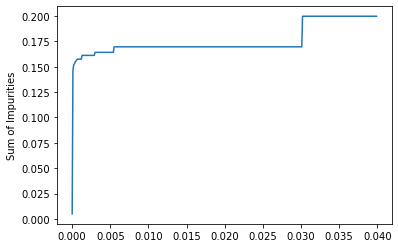

In [43]:
sns.lineplot(x=alphas,y=r['Sum of Impurities'])

<AxesSubplot:ylabel='Testing Accuracy'>

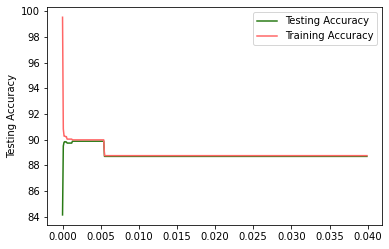

In [44]:
sns.lineplot(x=alphas,y=r['Testing Accuracy'],label='Testing Accuracy',color='#297A15')
sns.lineplot(x=alphas,y=r['Training Accuracy'],label='Training Accuracy',color='#ff6666')   

In [45]:
r[r['Alphas']==a]

,Alphas,Training Accuracy,Testing Accuracy,Sum of Impurities
13,0.0013,89.979536,89.876184,0.161112


2. For part (1), prepare a table representing train accuracy and testing accuracy for
each value of the Complexity parameter. Comment on over
tting, and under
tting
for each entry in the table. 10 marks
3. Replicate part (2) with sklearn Decision Tree Classi
er's `cost complexity pruning path'
function. Is there any deviation between the results from your implementation and
the inbuilt function? 5 marks

In [46]:
classifier = DecisionTreeClassifier()
pruning_path = classifier.cost_complexity_pruning_path(trainSet_x, trainSet_y)
ccp_alphas, impurities = pruning_path.ccp_alphas, pruning_path.impurities


In [47]:
ccp_alphas

array([0.        , 0.        , 0.        , ..., 0.00298236, 0.00544123,
       0.03012609])

In [48]:
impurities

array([0.00495416, 0.00495416, 0.00495416, ..., 0.16409397, 0.1695352 ,
       0.19966129])

<AxesSubplot:>

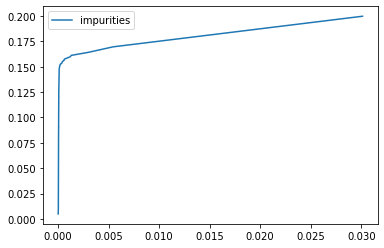

In [49]:
sns.lineplot(x=ccp_alphas,y=impurities,label='impurities')

In [50]:
clfs = []
for c in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=c)
    clf.fit(trainSet_x, trainSet_y)
    clfs.append(clf)

In [51]:
p_train = []
p_test = []
for x in clfs:

    p_test.append(x.predict(testSet_x))
    p_train.append(x.predict(trainSet_x))
    

In [52]:
acc_train = []
acc_test = []
for i in range(len(p_train)):
    acc_train.append(acc_(p_train[i],trainSet_y))
    acc_test.append(acc_(p_test[i],testSet_y))



In [53]:
len(clfs)

1310

In [54]:
pd.Series(acc_test)

0       84.057619
1       84.057619
2       84.057619
3       84.057619
4       84.057619
          ...    
1305    89.892369
1306    89.892369
1307    89.876184
1308    89.876184
1309    88.694667
Length: 1310, dtype: float64

In [55]:
len(ccp_alphas)

1310

In [56]:
len(impurities)

1310

<AxesSubplot:>

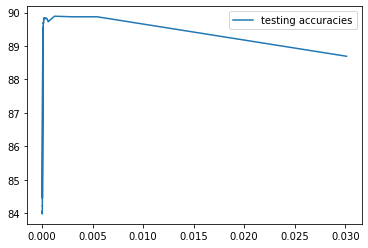

In [57]:
sns.lineplot(x=ccp_alphas,y=np.array(acc_test),label = 'testing accuracies')

In [58]:
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

<AxesSubplot:>

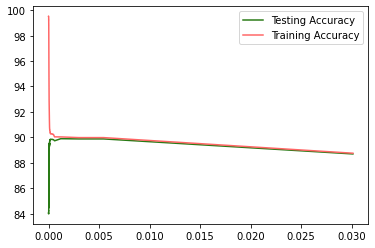

In [59]:
sns.lineplot(x=ccp_alphas,y=np.array(acc_test),label='Testing Accuracy',color='#297A15')
sns.lineplot(x=ccp_alphas,y=np.array(acc_train),label='Training Accuracy',color='#ff6666')   

In [60]:
max(acc_test)

89.89236869790402

In [61]:
90.18370154568261

90.18370154568261